In [24]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [25]:
# Leitura da base de dados
df_best = pd.read_csv('dataset/best_selling_video_games.csv')

In [26]:
# Inspesao do DataFrame
display(df_best.head(3))
display(df_best.tail(3))
display(df_best.shape)
display(df_best.info())
display(df_best.isnull().sum())

,Rank,Title,Platform(s),Developer(s),Publisher(s),Ref.,Releaseyear,Sales(millions),Series,Table_Number
0,1,Minecraft,Multi-platform,Mojang Studios,Mojang Studios,NaN,2011[b],350,Minecraft,1
1,2,Grand Theft Auto V,Multi-platform,Rockstar North,Rockstar Games,NaN,2013,225,Grand Theft Auto,1
2,3,Wii Sports[a],Wii,Nintendo EAD,Nintendo,NaN,2006,82.9,Wii,1


,Rank,Title,Platform(s),Developer(s),Publisher(s),Ref.,Releaseyear,Sales(millions),Series,Table_Number
47,48,Pokémon Sun/Moon/Ultra Sun/Ultra Moon,Nintendo 3DS,Game Freak,Nintendo/The Pokémon Company,[s],2016,25.59,Pokémon,1
48,49,Garry's Mod,PC,Facepunch Studios,Valve,NaN,2006,25.56,NaN,1
49,50,Pokémon Diamond/Pearl/Platinum,Nintendo DS,Game Freak,Nintendo/The Pokémon Company,[t],2006,25.5,Pokémon,1


(50, 10)

<class 'pandas.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Rank             50 non-null     str  
 1   Title            50 non-null     str  
 2   Platform(s)      50 non-null     str  
 3   Developer(s)     50 non-null     str  
 4   Publisher(s)     42 non-null     str  
 5   Ref.             10 non-null     str  
 6   Releaseyear      50 non-null     str  
 7   Sales(millions)  49 non-null     str  
 8   Series           45 non-null     str  
 9   Table_Number     50 non-null     int64
dtypes: int64(1), str(9)
memory usage: 4.0 KB


None

Rank                0
Title               0
Platform(s)         0
Developer(s)        0
Publisher(s)        8
Ref.               40
Releaseyear         0
Sales(millions)     1
Series              5
Table_Number        0
dtype: int64

In [27]:
# Tratamento e limpeza do DataFrame
mask_numerico = df_best['Rank'].astype(str).str.fullmatch(r"\d+")
df_best = df_best[mask_numerico]
df_best = df_best.drop(columns=["Ref."])
df_best['Rank'] = df_best['Rank'].astype(int)
df_best['Releaseyear'] = df_best['Releaseyear'].str.strip()
df_best['Releaseyear'] = df_best['Releaseyear'].str.replace(r"[\[\]]", "", regex=True)
df_best['Releaseyear'] = df_best['Releaseyear'].str.replace(r"[A-Za-z]", "", regex=True)
df_best['Releaseyear'] = pd.to_numeric(df_best['Releaseyear'], errors='coerce')
df_best['Sales(millions)'] = df_best['Sales(millions)'].astype(float)
df_best['Table_Number'] = df_best['Table_Number'].astype(int)
moda_coluna = df_best['Series'].mode()[0]
df_best['Series'] = df_best['Series'].fillna(moda_coluna)
df_best['Platform(s)'] = df_best['Platform(s)'].str.strip().str.lower()
display(df_best.head(3))
display(df_best.info())
display(df_best.nunique())

,Rank,Title,Platform(s),Developer(s),Publisher(s),Releaseyear,Sales(millions),Series,Table_Number
0,1,Minecraft,multi-platform,Mojang Studios,Mojang Studios,2011,350.0,Minecraft,1
1,2,Grand Theft Auto V,multi-platform,Rockstar North,Rockstar Games,2013,225.0,Grand Theft Auto,1
2,3,Wii Sports[a],wii,Nintendo EAD,Nintendo,2006,82.9,Wii,1


<class 'pandas.DataFrame'>
Index: 42 entries, 0 to 49
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             42 non-null     int64  
 1   Title            42 non-null     str    
 2   Platform(s)      42 non-null     str    
 3   Developer(s)     42 non-null     str    
 4   Publisher(s)     42 non-null     str    
 5   Releaseyear      42 non-null     int64  
 6   Sales(millions)  42 non-null     float64
 7   Series           42 non-null     str    
 8   Table_Number     42 non-null     int64  
dtypes: float64(1), int64(3), str(5)
memory usage: 3.3 KB


None

Rank               42
Title              42
Platform(s)        11
Developer(s)       26
Publisher(s)       18
Releaseyear        24
Sales(millions)    42
Series             21
Table_Number        1
dtype: int64

count     42.000000
mean      51.915476
std       57.516709
min       25.500000
25%       28.005000
50%       34.070000
75%       49.830000
max      350.000000
Name: Sales(millions), dtype: float64

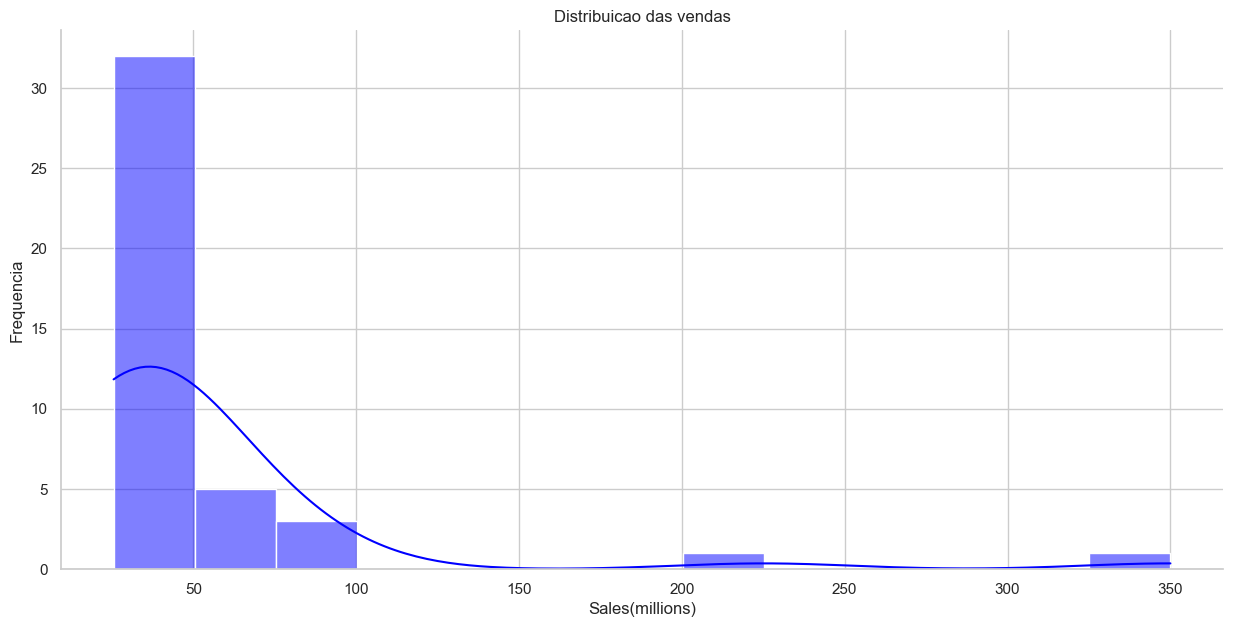

Sales(millions)
Publisher(s)                   Title                                                   
Activision                     Call of Duty: Black Ops                            26.20
                               Call of Duty: Black Ops III                        43.00
                               Call of Duty: Modern Warfare                       41.00
                               Call of Duty: Modern Warfare 3                     26.50
Bandai Namco                   Elden Ring                                         30.00
Blizzard Entertainment         Overwatch                                          50.00
CD Projekt                     The Witcher 3: Wild Hunt                           60.00
Capcom                         Monster Hunter: World                              29.10
Curve Digital                  Human: Fall Flat                                   55.00
Electronic Arts                It Takes Two                                       27.00
Game Science                   Black Myth: Wukong                                 28.00
Krafton                        PUBG: Battlegrounds                                75.00
Mojang Studios                 Minecraft                                         350.00
Nintendo                       Animal Crossing: New Horizons                      49.32
                               Duck Hunt[o]                                       28.30
                               Mario Kart 8/Deluxe                                79.05
                               Mario Kart Wii[i]                                  37.38
                               New Super Mario Bros.                              30.80
                               New Super Mario Bros. Wii                          30.32
                               Pokémon Gold/Silver/Crystal                        30.12
                               Pokémon Red/Blue/Yellow                            47.44
                               Super Mario Bros.[d]                               58.00
                               Super Mario Odyssey                                30.27
                               Super Smash Bros. Ultimate                         37.44
                               Tetris(Game Boy)[k]                                35.00
                               The Legend of Zelda: Breath of the Wild            35.34
                               Wii Fit/Plus[f]                                    43.80
                               Wii Play[p]                                        28.02
                               Wii Sports Resort[l]                               33.14
                               Wii Sports[a]                                      82.90
Nintendo/The Pokémon Company   Pokémon Diamond/Pearl/Platinum                     25.50
                               Pokémon Scarlet/Violet                             28.08
                               Pokémon Sun/Moon/Ultra Sun/Ultra Moon              25.59
                               Pokémon Sword/Shield                               27.08
Re-Logic/505 Games             Terraria                                           64.00
Rockstar Games                 Grand Theft Auto V                                225.00
                               Grand Theft Auto: San Andreas                      27.50
                               Red Dead Redemption 2                              82.00
Sony Computer Entertainment    The Last of Us/Remastered                          26.60
Sony Interactive Entertainment Marvel's Spider-Man/Remastered                     26.10
Valve                          Garry's Mod                                        25.56
Warner Bros. Games             Hogwarts Legacy                                    40.00

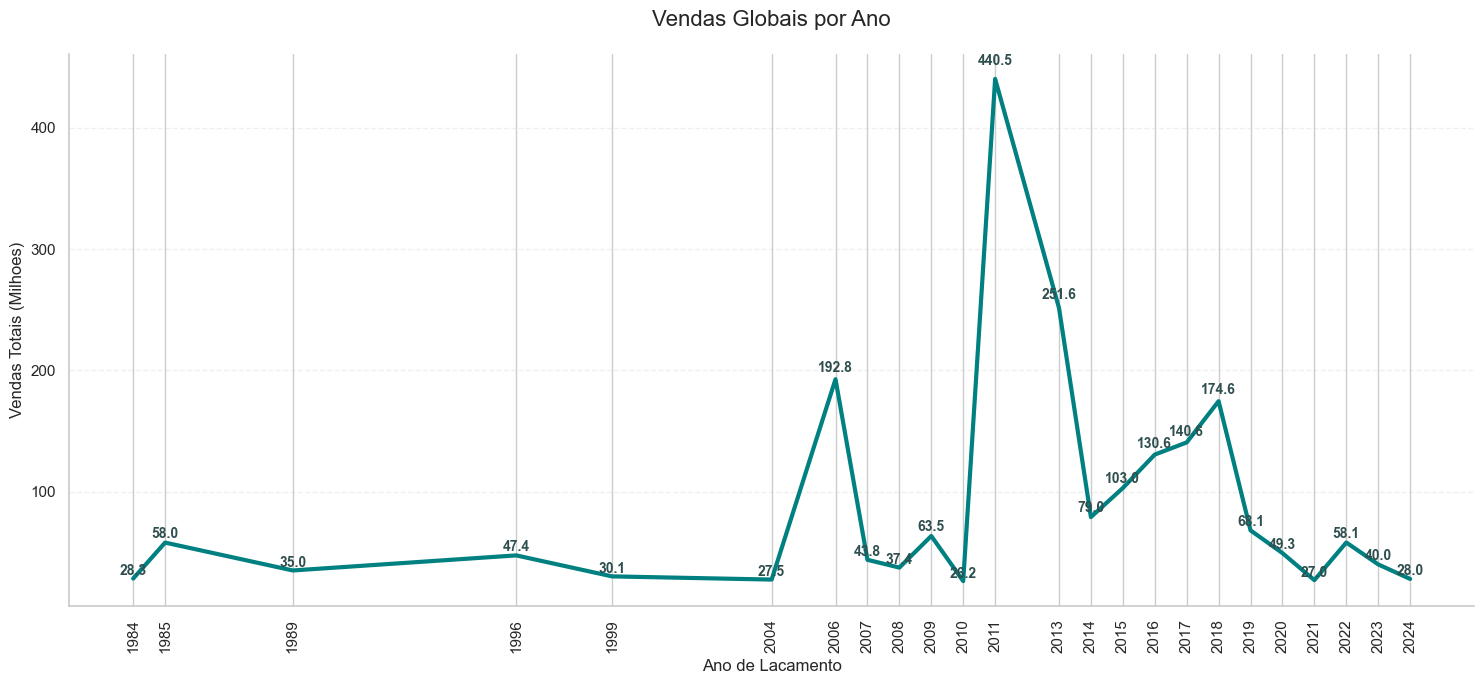

,Rank,Title,Platform(s),Developer(s),Publisher(s),Releaseyear,Sales(millions),Series,Table_Number
0,1,Minecraft,multi-platform,Mojang Studios,Mojang Studios,2011,350.00,Minecraft,1
1,2,Grand Theft Auto V,multi-platform,Rockstar North,Rockstar Games,2013,225.00,Grand Theft Auto,1
2,3,Wii Sports[a],wii,Nintendo EAD,Nintendo,2006,82.90,Wii,1
3,4,Red Dead Redemption 2,multi-platform,Rockstar Games,Rockstar Games,2018,82.00,Red Dead,1
4,5,Mario Kart 8/Deluxe,wii u/switch,Nintendo EAD/Nintendo EPD(Deluxe),Nintendo,2014,79.05,Mario Kart,1
5,6,PUBG: Battlegrounds,multi-platform,PUBG Studios,Krafton,2017,75.00,PUBG Universe,1
6,7,Terraria,multi-platform,Re-Logic,Re-Logic/505 Games,2011,64.00,Pokémon,1


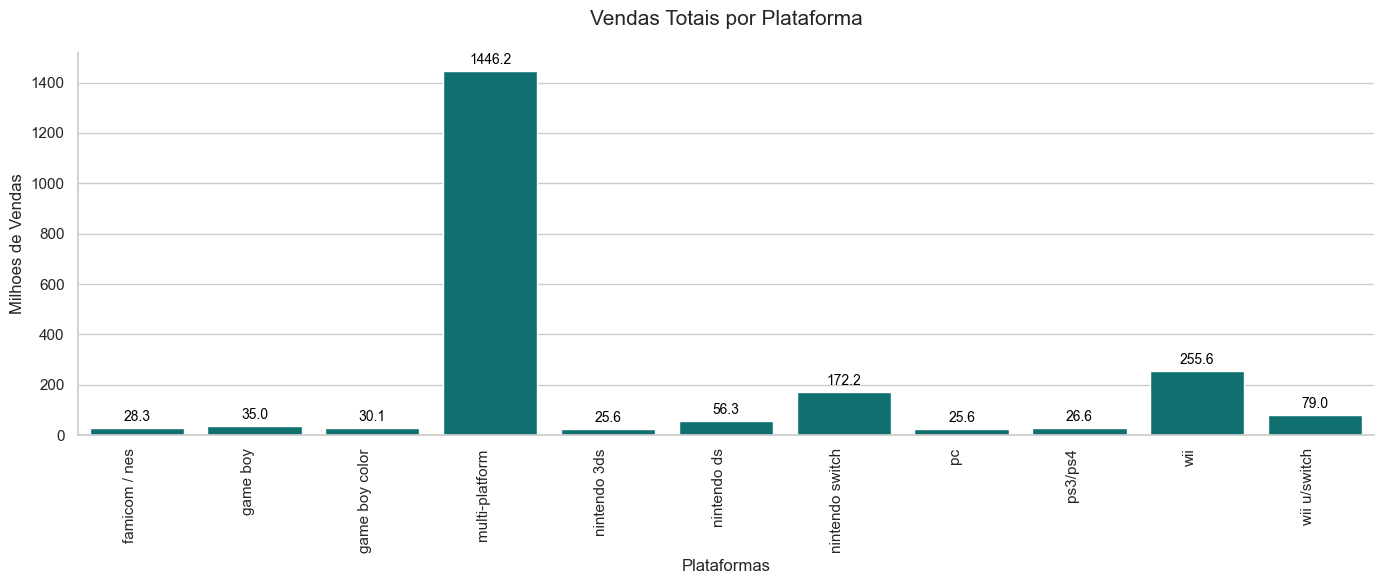

In [ ]:
# Analise Exploratoria
display(df_best["Sales(millions)"].describe())
plt.figure(figsize=(15, 7))
sns.histplot(df_best['Sales(millions)'], color='blue', edgecolor=None, kde=True)
plt.title('Distribuicao das vendas')
plt.xlabel('Sales(millions)')
plt.ylabel('Frequencia')
sns.despine()
plt.show()

# Agrupamento das vendas por jogo e editora
vendas_por_jogo_editora = df_best[["Title", "Publisher(s)", "Sales(millions)"]].groupby(["Publisher(s)", "Title"]).sum()
display(vendas_por_jogo_editora)

# Visualizacao grafica da evolucao temporal das vendas
df_plot = df_best.groupby('Releaseyear')['Sales(millions)'].sum().reset_index()
plt.figure(figsize=(15, 7))
ax = sns.lineplot(data = df_plot, x = 'Releaseyear', y = 'Sales(millions)', markers = 's', markersize=8, color='teal', lw=3)
plt.xticks(df_plot['Releaseyear'], rotation=90)
for x, y in zip(df_plot['Releaseyear'], df_plot['Sales(millions)']):
    plt.text(x, y + (y*0.02), f'{y:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='darkslategray')
plt.title('Vendas Globais por Ano', fontsize=16, pad=20)
plt.xlabel('Ano de Lacamento', fontsize=12)
plt.ylabel('Vendas Totais (Milhoes)', fontsize=12)
plt.grid(axis='y', ls='--', alpha=0.3)
sns.despine()
plt.tight_layout()
plt.show()

# Filtragem das vendas acima da media
vendas_media = df_best[df_best['Sales(millions)'] > 60]
display(vendas_media)

# Visualizacao grafica das plataformas por volume de vendas
p_grafico = df_best.groupby('Platform(s)')['Sales(millions)'].sum().reset_index()
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(data=p_grafico, x='Platform(s)', y='Sales(millions)', ax=ax, color='teal')
ax.set_xticks(range(len(p_grafico['Platform(s)'])))
ax.set_xticklabels(p_grafico['Platform(s)'], rotation=90, ha='right')
ax.set_title('Vendas Totais por Plataforma', fontsize=15, pad=20)
ax.set_xlabel('Plataformas', fontsize=12)
ax.set_ylabel('Milhoes de Vendas', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='baseline', fontsize=10, color='black', xytext=(0,5), textcoords='offset points')
sns.despine()
plt.tight_layout()
plt.show()